In [ ]:
!pip install numpy
!pip install scipy
!pip install pandas
!pip install xarray
!pip install matplotlib
!pip install h5netcdf
!pip install netCDF4
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 56.1 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
from glob import glob

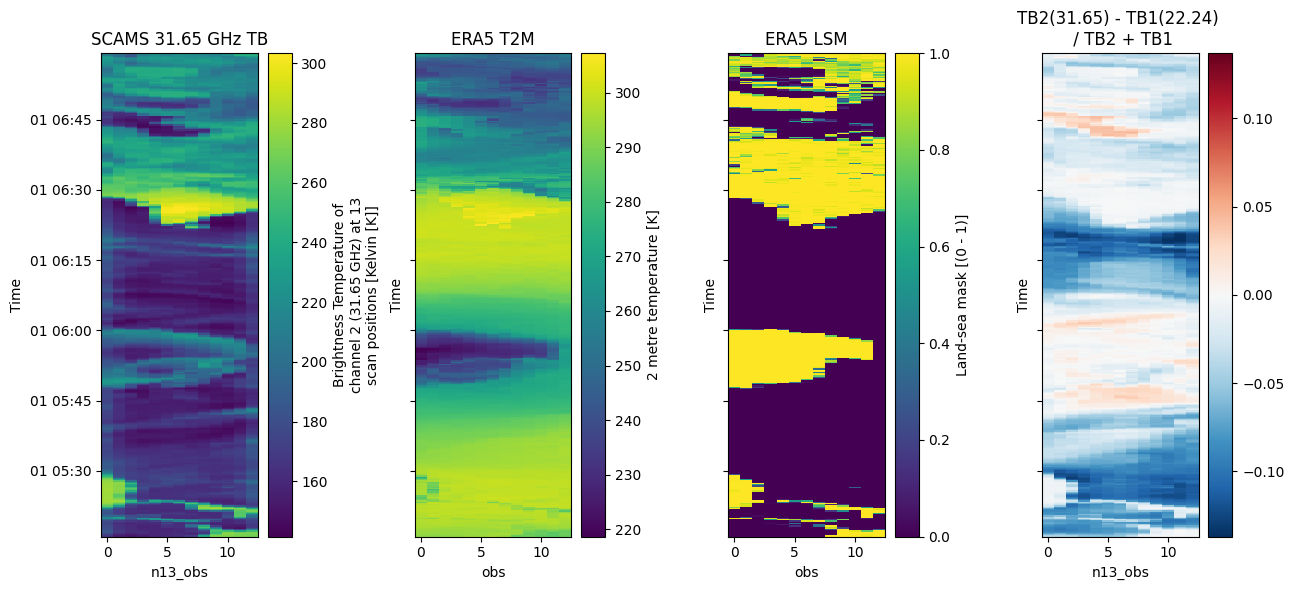

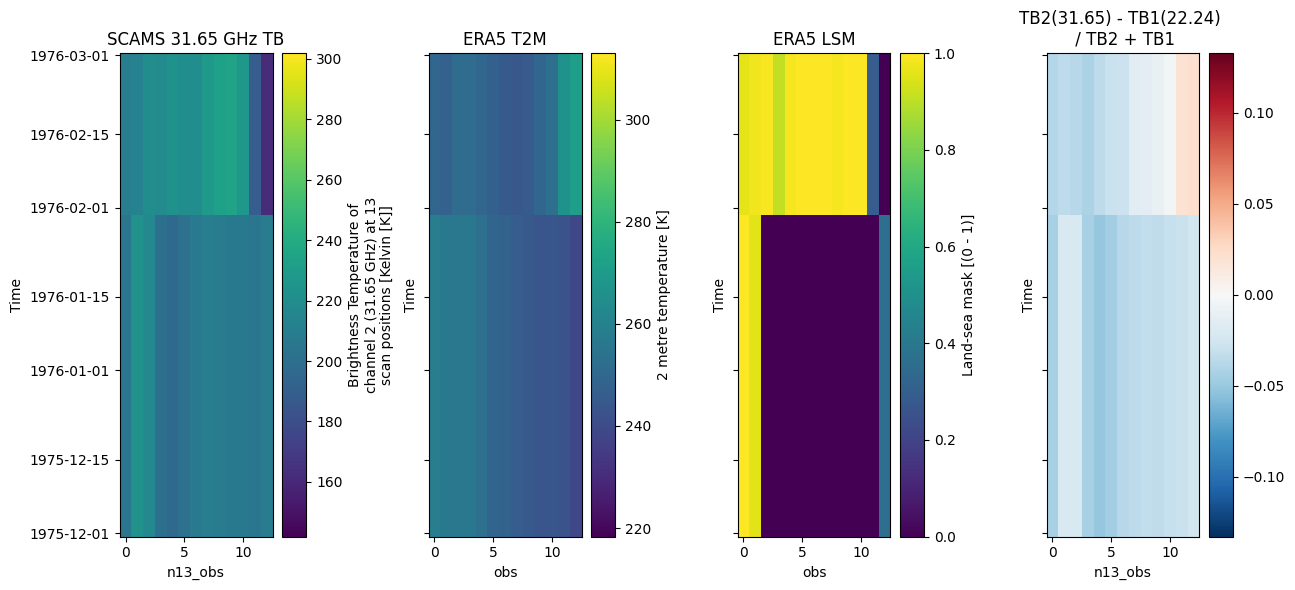

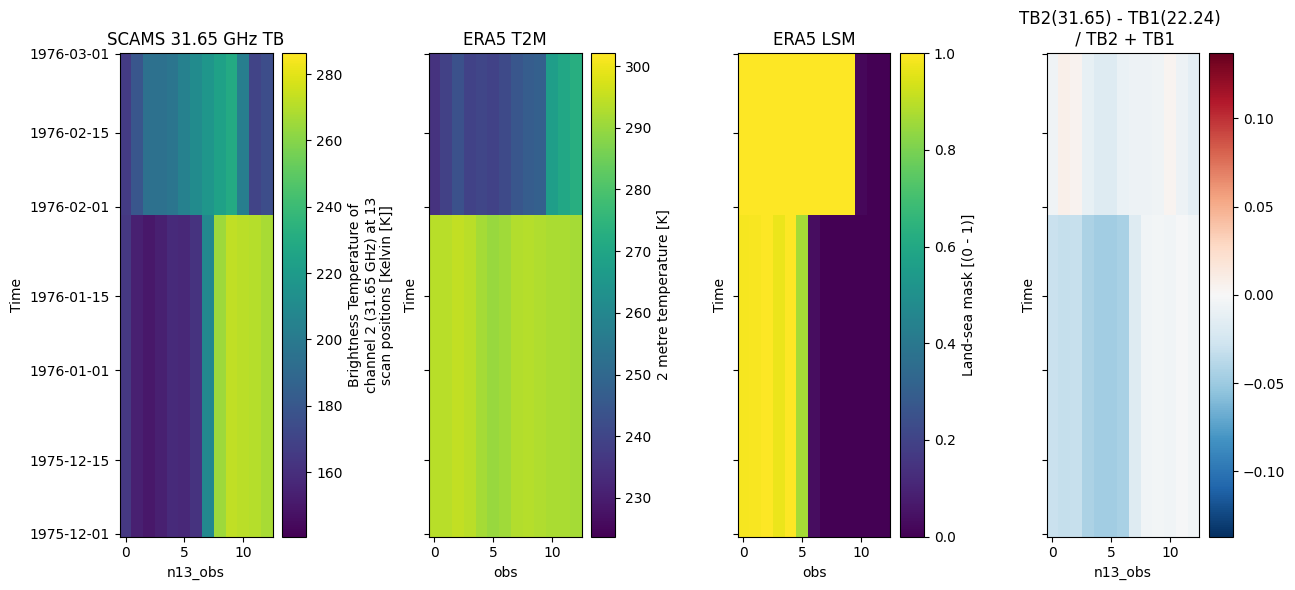

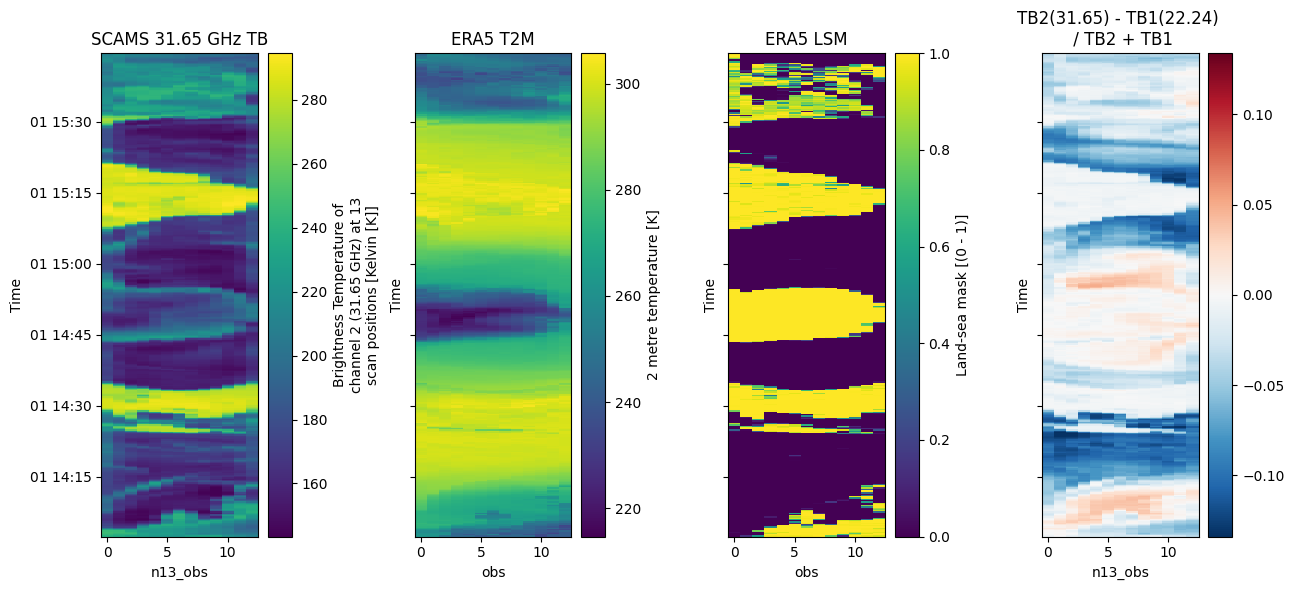

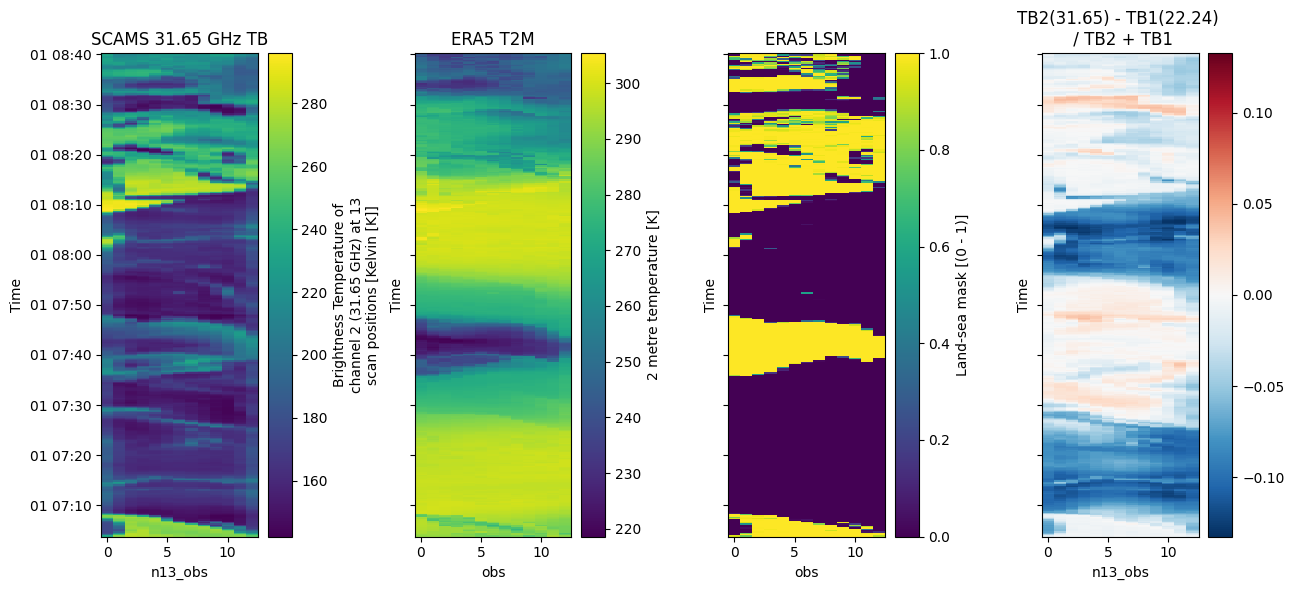

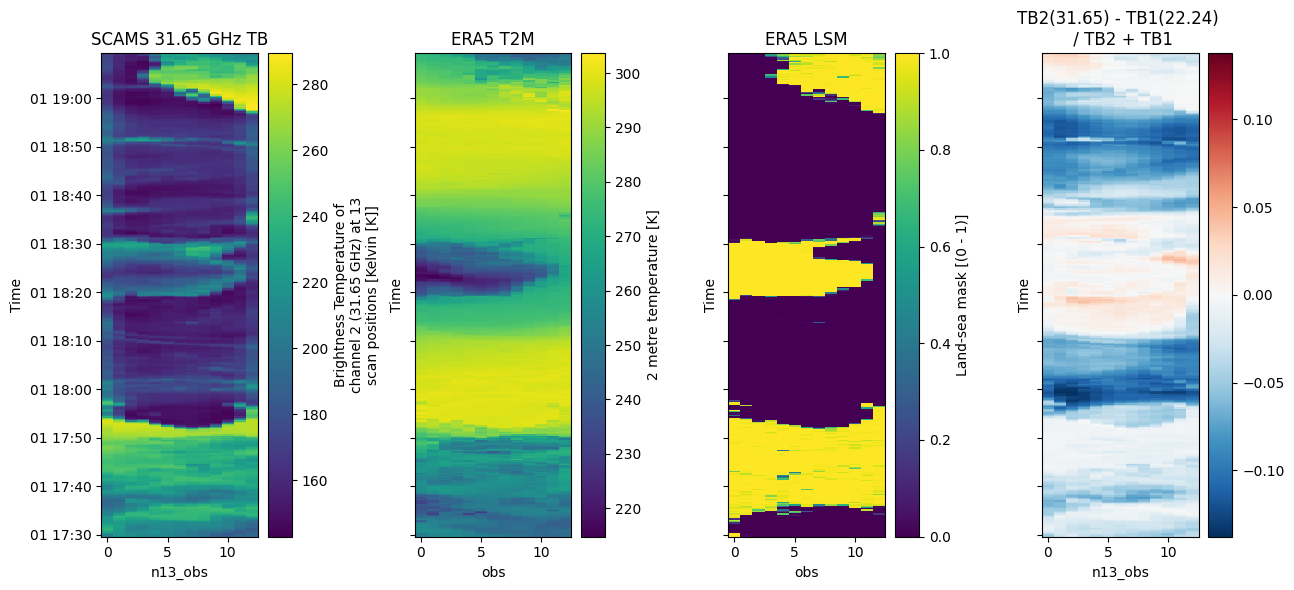

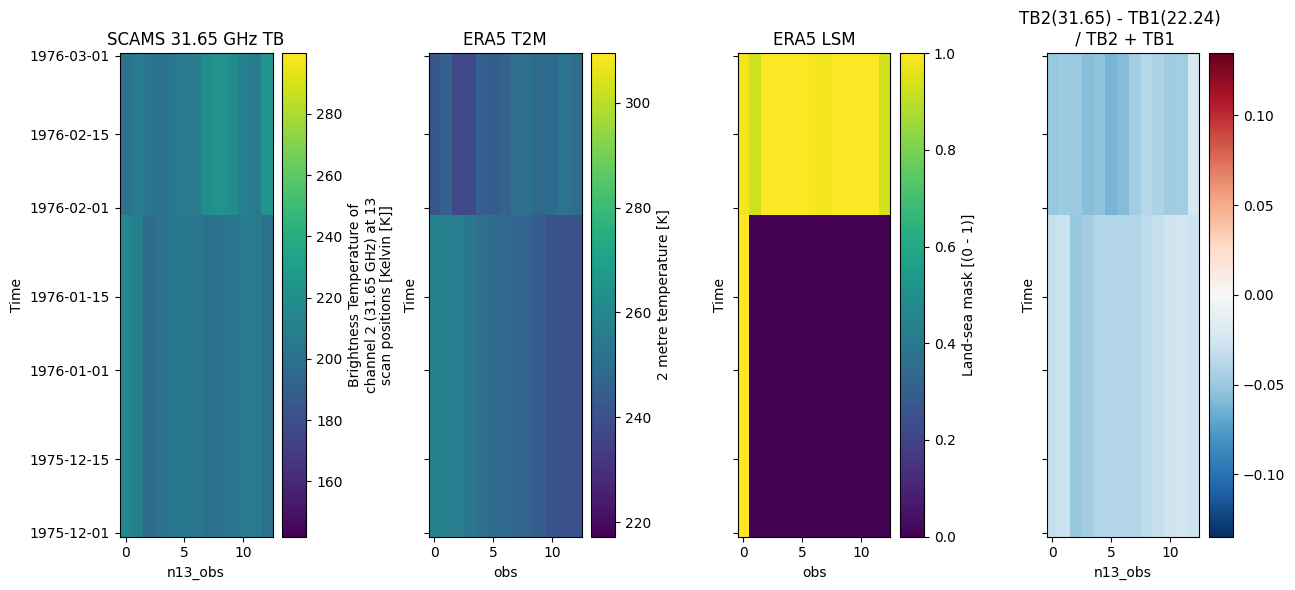

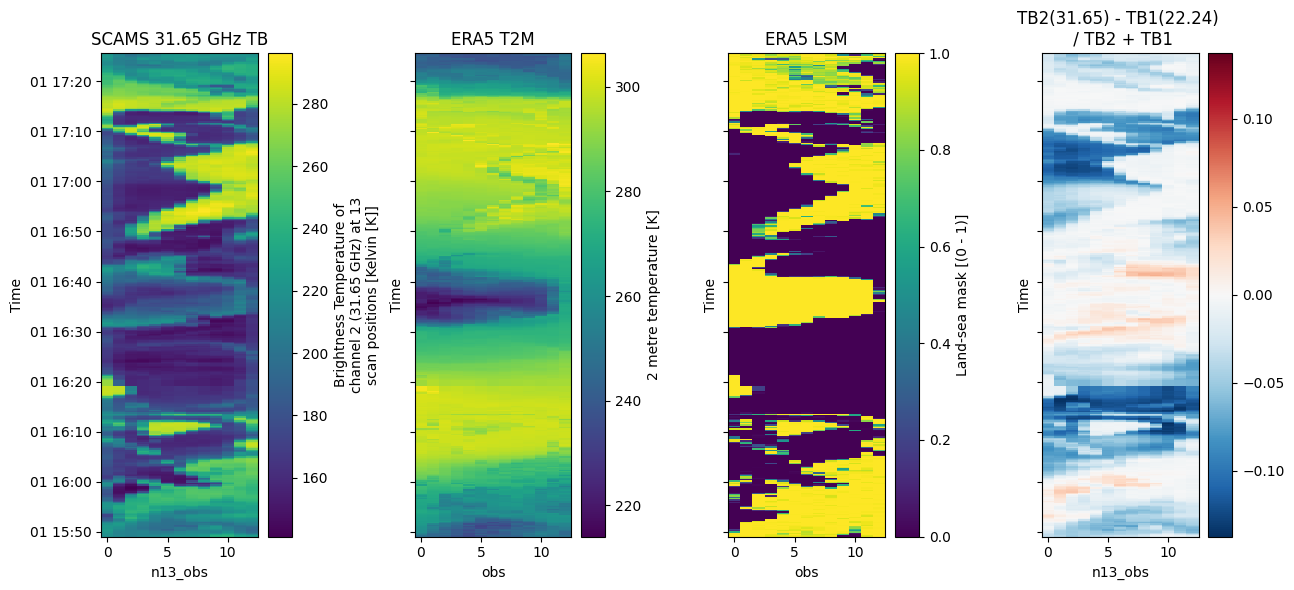

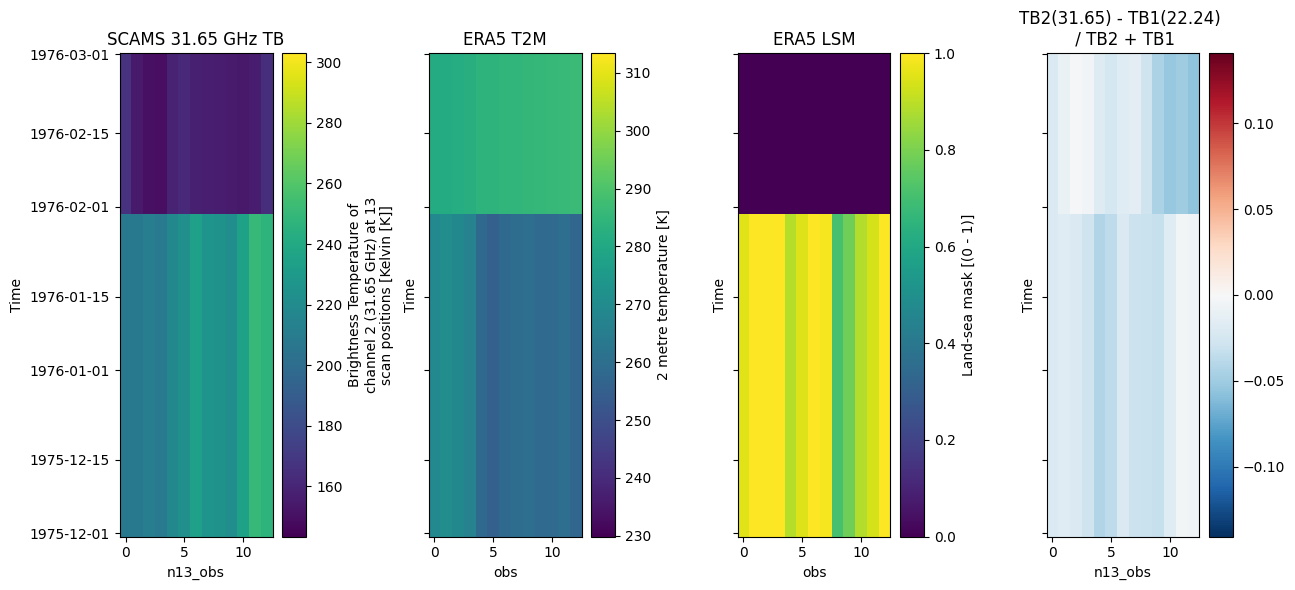

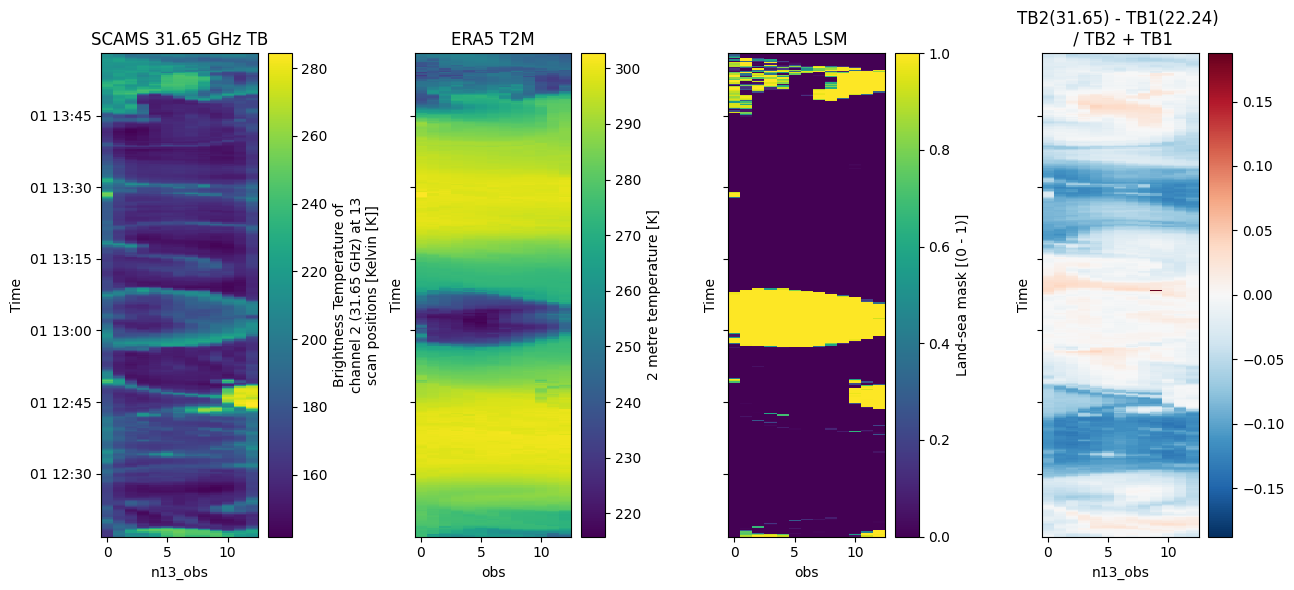

In [ ]:
year = '1976'
month = '03'

files = glob('/content/Nimbus6-SCAMS_%sm%s*_era5.nc' % (year, month) )

for f in files[0:15]:
    ds = xr.open_dataset(f)
    #ds.TBCH2#31.65 GHz
    #ds.t2m#era5
    #ds.lsm#ear5 land-sea mask
    rows, cols = 1, 4
    fig, ax = plt.subplots(rows, cols,
                       sharex='col',
                       sharey='row',
                       figsize=(13, 6))

    ds.TBCH2.plot(ax=ax[0])
    ax[0].set_title('SCAMS 31.65 GHz TB')

    ds.t2m.plot(ax=ax[1])
    ax[1].set_title('ERA5 T2M')

    ds.lsm.plot(ax=ax[2])
    ax[2].set_title('ERA5 LSM')

    rad = ((ds.TBCH2 - ds.TBCH1)/(ds.TBCH2 + ds.TBCH1))
    rad.plot(ax=ax[3])
    ax[3].set_title('TB2(31.65) - TB1(22.24) \n / TB2 + TB1')

    plt.tight_layout()
    plt.show()

In [ ]:
ds=xr.open_dataset('/content/Nimbus6-SCAMS_1976m0301t051552_o03525_DS17_era5.nc')
# print(ds)#
print(print(ds.data_vars))
# time_vector = ds['Time']
# print(time_vector[:5])
# print(ds.Time)
# print(ds['DATFLG'].values)
# print(ds['TBCH1'].values)
print(ds['LAT'].values)



Data variables:
    TACH1        (Time, n13_obs) float64 40kB ...
    TACH2        (Time, n13_obs) float64 40kB ...
    TACH3        (Time, n13_obs) float64 40kB ...
    TACH4        (Time, n13_obs) float64 40kB ...
    TACH5        (Time, n13_obs) float64 40kB ...
    TBCH1        (Time, n13_obs) float64 40kB ...
    TBCH2        (Time, n13_obs) float64 40kB ...
    TBCH3        (Time, n13_obs) float64 40kB ...
    TBCH4        (Time, n13_obs) float64 40kB ...
    TBCH5        (Time, n13_obs) float64 40kB ...
    ELEV         (Time, n13_obs) float64 40kB ...
    LAT          (Time, n13_obs) float64 40kB ...
    LON          (Time, n13_obs) float64 40kB ...
    REFLEC       (Time, n13_obs) float64 40kB ...
    H2OVAP       (Time, n13_obs) float64 40kB ...
    H2OLIQ       (Time, n13_obs) float64 40kB ...
    GPT1K        (Time, n13_obs) float64 40kB ...
    GPT500       (Time, n13_obs) float64 40kB ...
    GPT250       (Time, n13_obs) float64 40kB ...
    T1000        (Time, n13_obs) f

In [ ]:
print(len(ds['T100'].values))

385


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


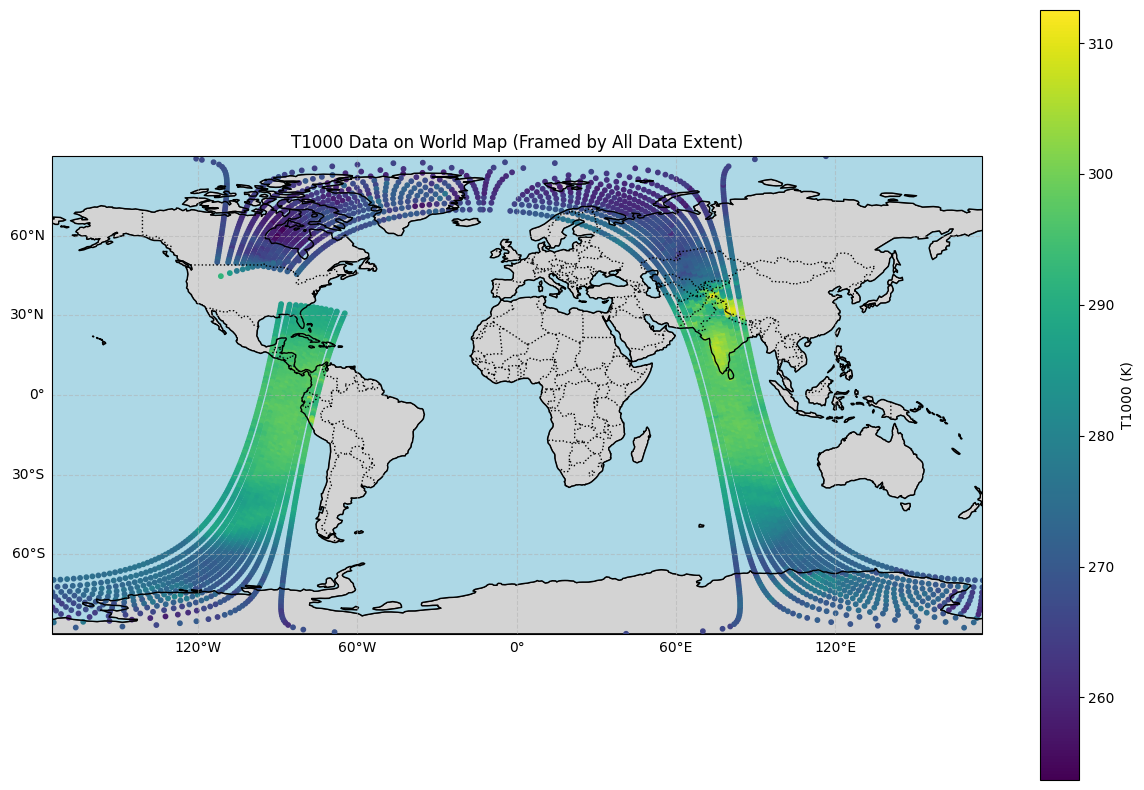

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Get all data points by flattening the arrays across all time steps and observations
lon_data = ds['LON'].values.flatten()
lat_data = ds['LAT'].values.flatten()
t1000_data = ds['T1000'].values.flatten()

# Calculate the extent of the data using all flattened points
min_lat, max_lat = np.nanmin(lat_data), np.nanmax(lat_data)
min_lon, max_lon = np.nanmin(lon_data), np.nanmax(lon_data)

# Adjust longitude for plotting if it spans the antimeridian or is in 0-360 range
# Cartopy typically prefers -180 to 180. If lon_data is 0-360, adjust it.
lon_adjusted = np.where(lon_data > 180, lon_data - 360, lon_data)
min_lon_adj, max_lon_adj = np.nanmin(lon_adjusted), np.nanmax(lon_adjusted)

# Create the figure and axes with a PlateCarree projection
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map to focus on the data region
# Add some padding to the extent for better visualization
padding = 5 # degrees
ax.set_extent([min_lon_adj - padding, max_lon_adj + padding, min_lat - padding, max_lat + padding], crs=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add gridlines with labels
gridlines = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gridlines.top_labels = False
gridlines.right_labels = False

# Plot the T1000 data as scatter points
scatter = ax.scatter(lon_adjusted, lat_data, c=t1000_data, cmap='viridis', s=10, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05, label='T1000 (K)')

# Add a title
ax.set_title('T1000 Data on World Map (Framed by All Data Extent)')

plt.show()

In [ ]:
import numpy as np

valid_files = []

for f in files:
    try:
        ds = xr.open_dataset(f)
        if 'Time' in ds.dims:
            time_values = ds['Time'].values
            # Check if all timestamps are unique
            if len(time_values) == len(np.unique(time_values)):
                valid_files.append(f)
        ds.close() # Close the dataset to release resources
    except Exception as e:
        print(f"Could not open or process file {f}: {e}")

print(f"Found {len(valid_files)} valid files out of {len(files)}:")


Found 10 valid files out of 10:


In [ ]:
import numpy as np

filtered_valid_files = []
removed_files_count = 0

def check_consecutive_identical_percentage_2d(array, threshold=5): # Threshold changed to 15%
    """
    Checks if any row or column in a 2D array has a percentage of consecutive
    identical values (including NaNs) exceeding a given threshold.
    Returns True if problematic (should be removed), False otherwise.
    Also returns the maximum percentage found in any row or column.
    """
    if array.ndim != 2:
        return False, 0.0 # Not problematic, max_percentage = 0

    num_rows, num_cols = array.shape
    max_perc = 0.0

    # Check rows
    for r_idx in range(num_rows):
        row = array[r_idx, :]
        if num_cols > 1: # Can only have consecutive pairs if more than 1 element
            consecutive_flags = (row[:-1] == row[1:]) | (np.isnan(row[:-1]) & np.isnan(row[1:]))
            consecutive_count = consecutive_flags.sum()
            possible_pairs = num_cols - 1
            if possible_pairs > 0:
                current_perc = (consecutive_count / possible_pairs) * 100
                if current_perc > max_perc:
                    max_perc = current_perc
                if current_perc > threshold:
                    return True, max_perc # Found a problematic row, return max_perc

    # Check columns
    for c_idx in range(num_cols):
        col = array[:, c_idx]
        if num_rows > 1: # Can only have consecutive pairs if more than 1 element
            consecutive_flags = (col[:-1] == col[1:]) | (np.isnan(col[:-1]) & np.isnan(col[1:]))
            consecutive_count = consecutive_flags.sum()
            possible_pairs = num_rows - 1
            if possible_pairs > 0:
                current_perc = (consecutive_count / possible_pairs) * 100
                if current_perc > max_perc:
                    max_perc = current_perc
                if current_perc > threshold:
                    return True, max_perc # Found a problematic column, return max_perc

    return False, max_perc # No problematic rows or columns found, return overall max_perc

# Identify the first file that the user believes is problematic for diagnostics
# Note: At this point, filtered_valid_files is not yet populated by the loop,
# so we use valid_files[0] if filtered_valid_files is empty, or the first
# element if it was already populated in a previous run.
problematic_file_for_diagnostics = valid_files[0] if not filtered_valid_files else filtered_valid_files[0]

for file_path in valid_files: # Iterate through the 'valid_files' list
    try:
        ds = xr.open_dataset(file_path)

        tbch1_array = ds['TBCH1'].values  # Get the 2D numpy array (Time, n13_obs)
        tbch2_array = ds['TBCH2'].values  # Get the 2D numpy array (Time, n13_obs)

        # Determine if TBCH1 is problematic (has 'lines') and get max percentage
        tbch1_is_problematic, max_perc_tbch1 = check_consecutive_identical_percentage_2d(tbch1_array, threshold=15) # Use new threshold

        # Determine if TBCH2 is problematic (has 'lines') and get max percentage
        tbch2_is_problematic, max_perc_tbch2 = check_consecutive_identical_percentage_2d(tbch2_array, threshold=15) # Use new threshold

        # Print diagnostics for the first file
        if file_path == problematic_file_for_diagnostics:
            print(f"\n--- Diagnostics for {file_path.split('/')[-1]} ---")
            print(f"  TBCH1: Max consecutive identical % in any row/column = {max_perc_tbch1:.2f}%")
            print(f"  TBCH2: Max consecutive identical % in any row/column = {max_perc_tbch2:.2f}%")
            print(f"  Filtering status: TBCH1 problematic = {tbch1_is_problematic}, TBCH2 problematic = {tbch2_is_problematic}")
            print("--------------------------------------------------")

        # Filter based on the 'lines' criteria for either channel
        if not tbch1_is_problematic and not tbch2_is_problematic:
            filtered_valid_files.append(file_path)
        else:
            removed_files_count += 1
            # Optional: print why it was removed
            # print(f"Removing {file_path} due to consecutive identical value 'lines' in TBCH1 or TBCH2.")

        ds.close()

    except Exception as e:
        print(f"Could not process file {file_path}: {e}")
        removed_files_count += 1

print(f"Initial valid files: {len(valid_files)}")
print(f"Files removed due to processing errors or consecutive identical value 'lines' exceeding 15% in rows/columns: {removed_files_count}")
print(f"Remaining filtered valid files: {len(filtered_valid_files)}")


--- Diagnostics for Nimbus6-SCAMS_1976m0301t051552_o03525_DS17_era5.nc ---
  TBCH1: Max consecutive identical % in any row/column = 8.33%
  TBCH2: Max consecutive identical % in any row/column = 16.67%
  Filtering status: TBCH1 problematic = False, TBCH2 problematic = True
--------------------------------------------------
Initial valid files: 10
Files removed due to processing errors or consecutive identical value 'lines' exceeding 15% in rows/columns: 5
Remaining filtered valid files: 5


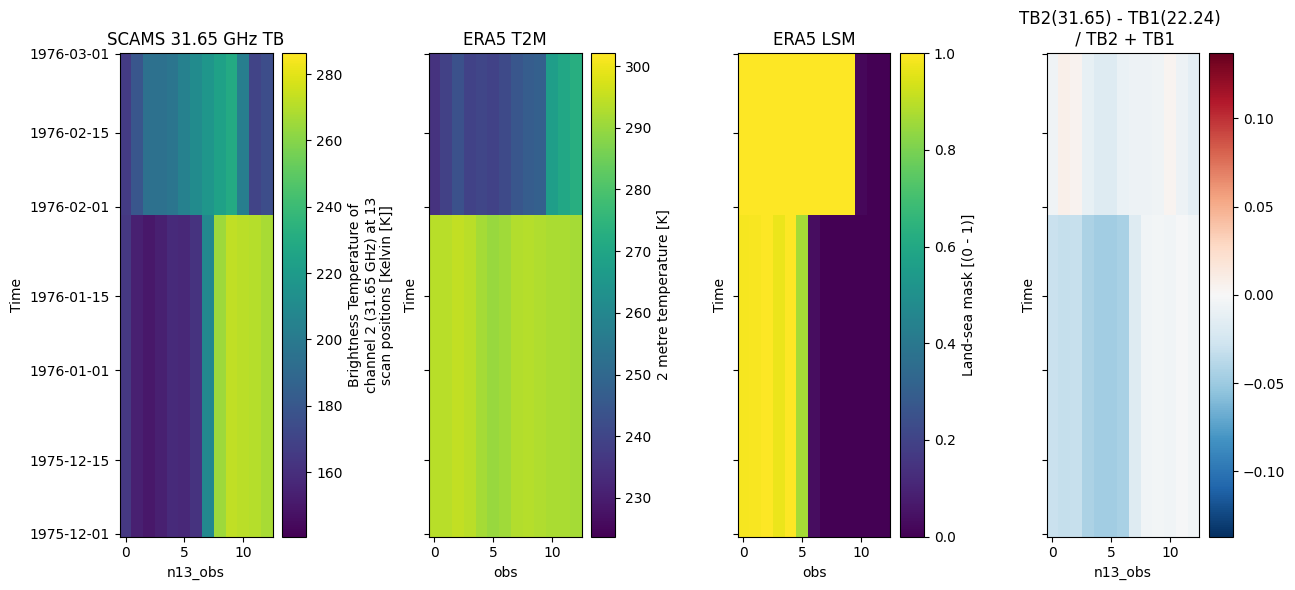

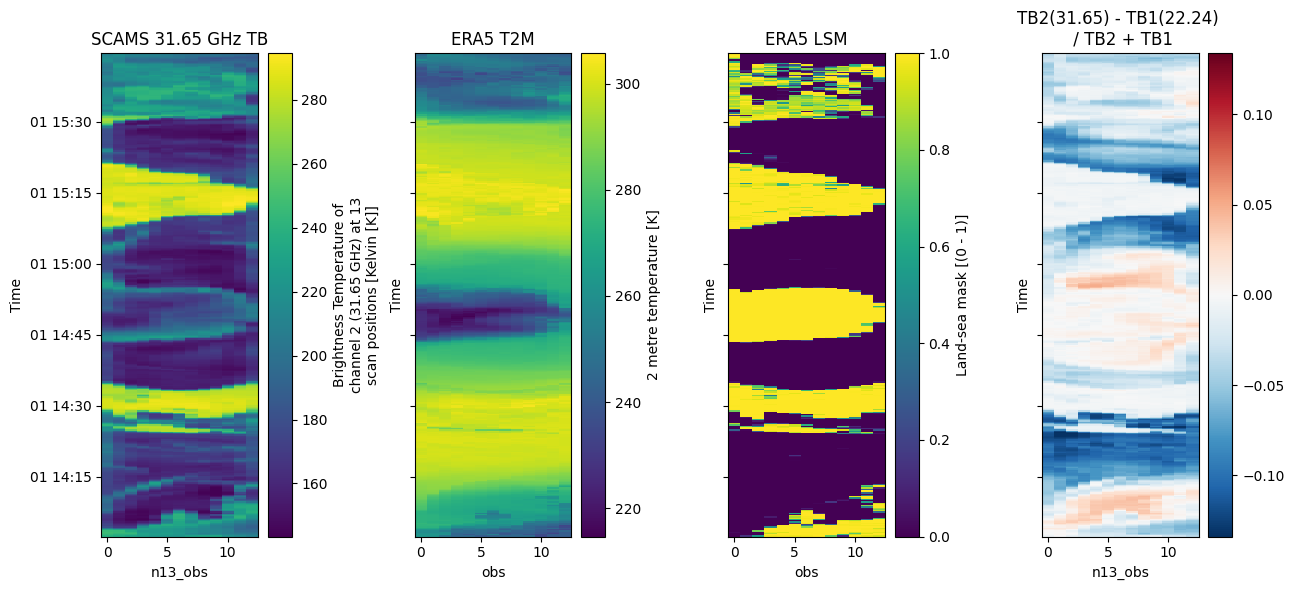

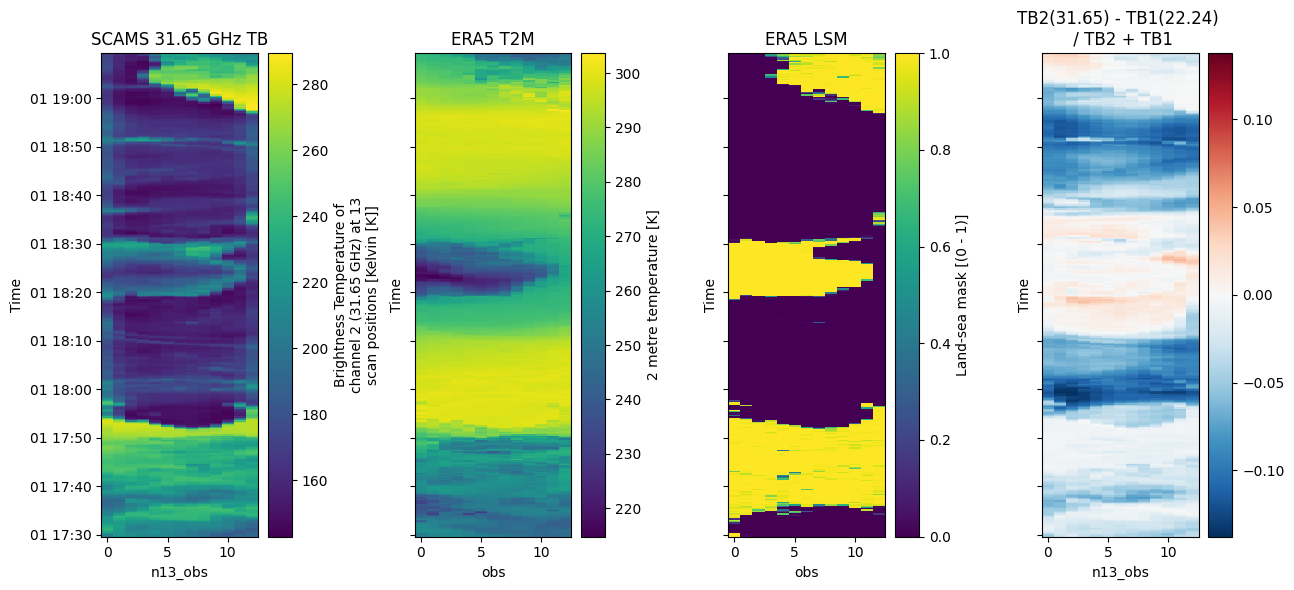

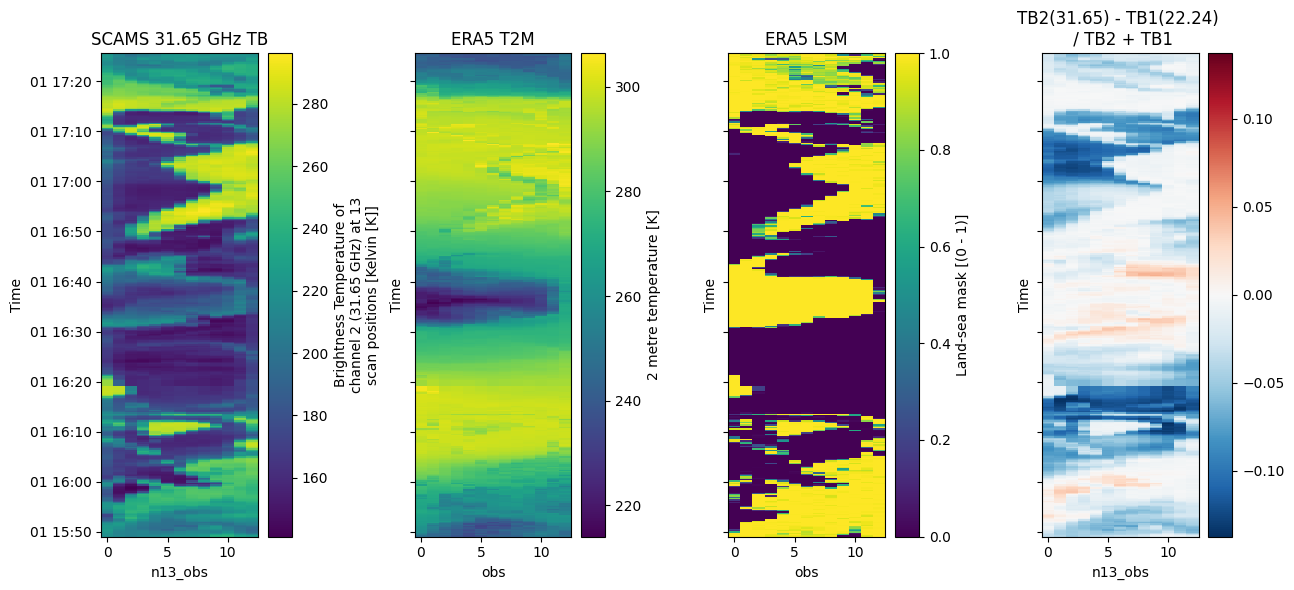

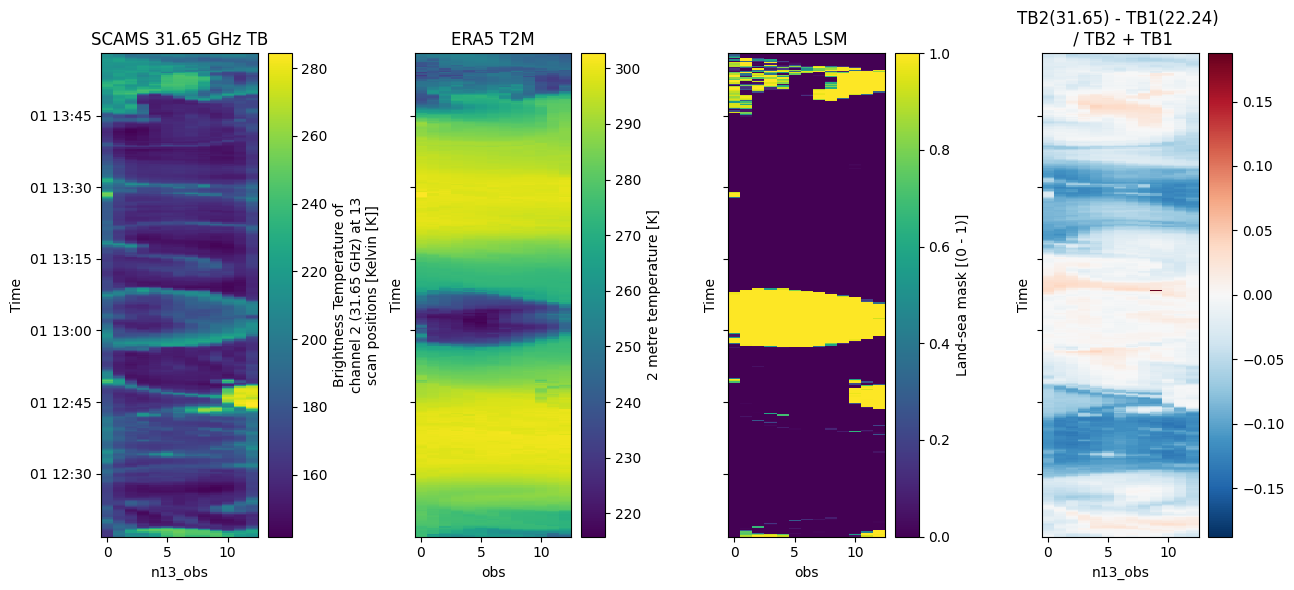

In [ ]:

for f in filtered_valid_files[0:15]:
    ds = xr.open_dataset(f)
    #ds.TBCH2#31.65 GHz
    #ds.t2m#era5
    #ds.lsm#ear5 land-sea mask
    rows, cols = 1, 4
    fig, ax = plt.subplots(rows, cols,
                       sharex='col',
                       sharey='row',
                       figsize=(13, 6))

    ds.TBCH2.plot(ax=ax[0])
    ax[0].set_title('SCAMS 31.65 GHz TB')

    ds.t2m.plot(ax=ax[1])
    ax[1].set_title('ERA5 T2M')

    ds.lsm.plot(ax=ax[2])
    ax[2].set_title('ERA5 LSM')

    rad = ((ds.TBCH2 - ds.TBCH1)/(ds.TBCH2 + ds.TBCH1))
    rad.plot(ax=ax[3])
    ax[3].set_title('TB2(31.65) - TB1(22.24) \n / TB2 + TB1')

    plt.tight_layout()
    plt.show()

In [12]:
import numpy as np
import xarray as xr

# 1. Initialize empty lists
all_lon = []
all_lat = []
all_t1000 = []

# 2. Loop through each file path in the filtered_valid_files list
for file_path in filtered_valid_files:
    try:
        # 3. Open each NetCDF file as an xarray.Dataset
        ds = xr.open_dataset(file_path)

        # 4. Extract the LON, LAT, and T1000 data variables
        # 5. Convert each data variable to a NumPy array and flatten it
        all_lon.extend(ds['LON'].values.flatten())
        all_lat.extend(ds['LAT'].values.flatten())
        all_t1000.extend(ds['TBCH1'].values.flatten())

        ds.close()
    except Exception as e:
        print(f"Could not process file {file_path}: {e}")

# 7. Concatenate these lists into single NumPy arrays
final_lon = np.array(all_lon)
final_lat = np.array(all_lat)
final_t1000 = np.array(all_t1000)

print(f"Total collected LON points: {len(final_lon)}")
print(f"Total collected LAT points: {len(final_lat)}")
print(f"Total collected T1000 points: {len(final_t1000)}")

Total collected LON points: 24817
Total collected LAT points: 24817
Total collected T1000 points: 24817


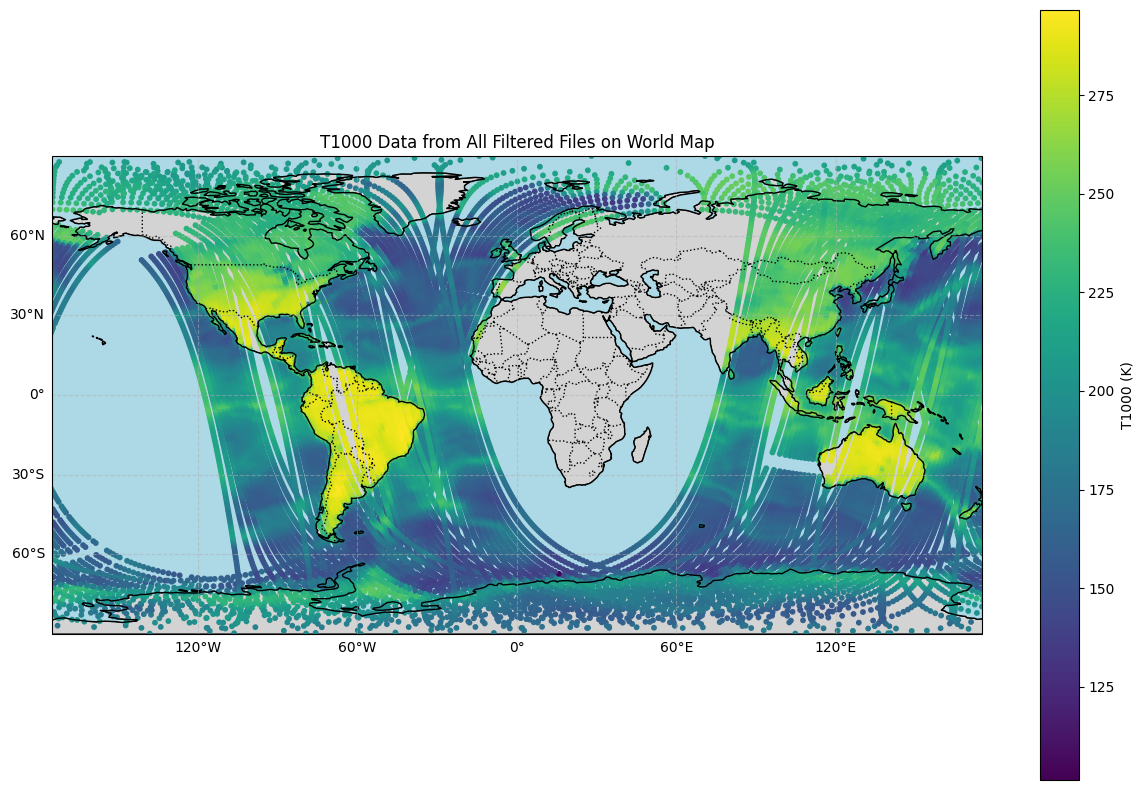

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 1. Calculate the minimum and maximum values for final_lat and final_lon
min_lat = np.nanmin(final_lat)
max_lat = np.nanmax(final_lat)

# Adjust longitude for plotting if it spans the antimeridian or is in 0-360 range.
# Cartopy typically prefers -180 to 180. If final_lon is 0-360, adjust it.
final_lon_adjusted = np.where(final_lon > 180, final_lon - 360, final_lon)
min_lon = np.nanmin(final_lon_adjusted)
max_lon = np.nanmax(final_lon_adjusted)

# 2. Create a figure and an axes object with a Plate Carree projection
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 3. Set the extent of the map, adding a small padding
padding = 5 # degrees
ax.set_extent([min_lon - padding, max_lon + padding, min_lat - padding, max_lat + padding], crs=ccrs.PlateCarree())

# 4. Add geographical features to the map
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 5. Add gridlines to the map with labels
gridlines = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gridlines.top_labels = False
gridlines.right_labels = False

# 6. Create a scatter plot of final_lon and final_lat on the map
scatter = ax.scatter(final_lon_adjusted, final_lat, c=final_t1000, cmap='viridis', s=10, transform=ccrs.PlateCarree())

# 7. Add a colorbar to the plot
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05, label='T1000 (K)')

# 8. Add a descriptive title to the plot
ax.set_title('T1000 Data from All Filtered Files on World Map')

# 9. Display the plot
plt.show()

/usr/local/lib/python3.12/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.12/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/

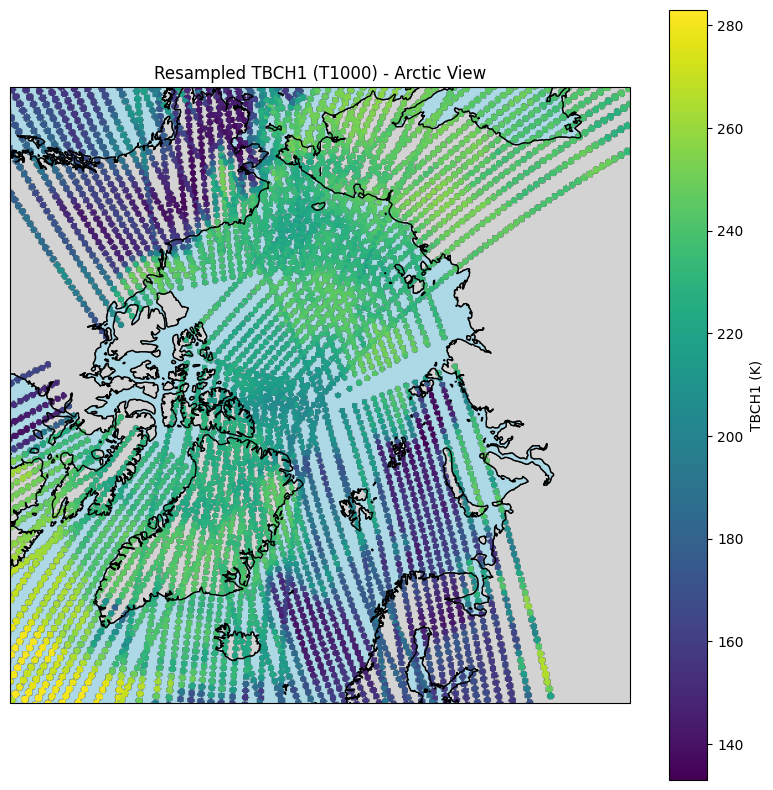

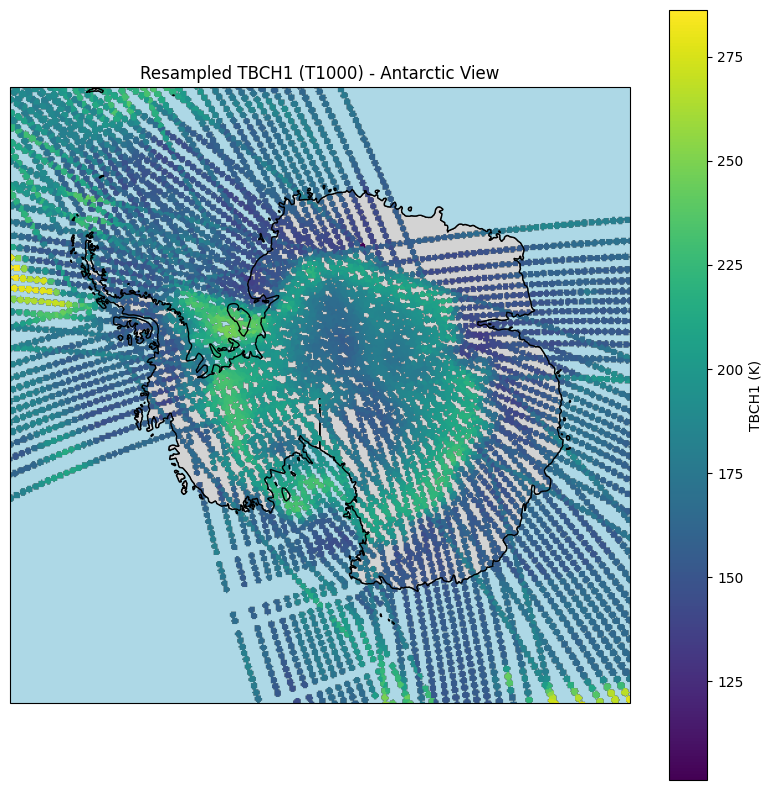

In [19]:
import pyresample as pr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Combine all data into a structured array or just filter for valid points
# Remove NaN values from the final_lon, final_lat, final_t1000 arrays
valid_indices = ~np.isnan(final_lon) & ~np.isnan(final_lat) & ~np.isnan(final_t1000)
valid_lon = final_lon[valid_indices]
valid_lat = final_lat[valid_indices]
valid_t1000 = final_t1000[valid_indices]

# Adjust longitude for source points if needed (e.g., 0-360 to -180-180)
# Assuming valid_lon is already adjusted to -180 to 180 range from previous steps
source_lons = np.where(valid_lon > 180, valid_lon - 360, valid_lon)
source_lats = valid_lat
source_data = valid_t1000

# 1. Define the source grid (original observation points)
source_grid = pr.geometry.SwathDefinition(lons=source_lons, lats=source_lats)

# 2. Define the target grid (for Arctic and Antarctic projections)
# Arctic Stereographic Projection using EPSG init string
area_id_arctic = 'north_polar_stereo'
description_arctic = 'North Polar Stereographic'
proj_id_arctic = 'npstere'
# Use an EPSG init string, which Pyproj/PROJ can robustly interpret
projection_arctic_epsg = '+init=EPSG:3413' # WGS 84 / NSIDC Sea Ice Polar Stereographic North
width_arctic = 500  # Number of pixels in x direction
height_arctic = 500 # Number of pixels in y direction
extent_arctic = (-5000000, -5000000, 5000000, 5000000) # (left, lower, right, upper) in meters

target_area_arctic = pr.geometry.AreaDefinition(area_id_arctic, description_arctic,
                                             proj_id_arctic, projection_arctic_epsg, # Pass EPSG init string
                                             width_arctic, height_arctic, extent_arctic)

# Antarctic Stereographic Projection using EPSG init string
area_id_antarctic = 'south_polar_stereo'
description_antarctic = 'South Polar Stereographic'
proj_id_antarctic = 'spstere'
# Use an EPSG init string, which Pyproj/PROJ can robustly interpret
projection_antarctic_epsg = '+init=EPSG:3031' # WGS 84 / Antarctic Polar Stereographic
width_antarctic = 500  # Number of pixels in x direction
height_antarctic = 500 # Number of pixels in y direction
extent_antarctic = (-5000000, -5000000, 5000000, 5000000) # (left, lower, right, upper) in meters

target_area_antarctic = pr.geometry.AreaDefinition(area_id_antarctic, description_antarctic,
                                                proj_id_antarctic, projection_antarctic_epsg, # Pass EPSG init string
                                                width_antarctic, height_antarctic, extent_antarctic)

# 3. Resample the data to the target grids
# Using nearest neighbor for simplicity, but more advanced options exist
resampled_data_arctic = pr.kd_tree.resample_nearest(source_grid, source_data, target_area_arctic, radius_of_influence=50000, fill_value=np.nan)
resampled_data_antarctic = pr.kd_tree.resample_nearest(source_grid, source_data, target_area_antarctic, radius_of_influence=50000, fill_value=np.nan)

# 4. Plotting

# Arctic Plot
fig_arctic = plt.figure(figsize=(10, 10))
ax_arctic = fig_arctic.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax_arctic.set_title('Resampled TBCH1 (T1000) - Arctic View')

ax_arctic.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax_arctic.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax_arctic.add_feature(cfeature.COASTLINE)

# Set extent for Arctic to latitudes above 60N
ax_arctic.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

im_arctic = ax_arctic.imshow(resampled_data_arctic, transform=ccrs.NorthPolarStereo(),
                         extent=ax_arctic.get_extent(), origin='upper', cmap='viridis')

plt.colorbar(im_arctic, ax=ax_arctic, orientation='vertical', pad=0.05, label='TBCH1 (K)')
plt.show()

# Antarctic Plot
fig_antarctic = plt.figure(figsize=(10, 10))
ax_antarctic = fig_antarctic.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax_antarctic.set_title('Resampled TBCH1 (T1000) - Antarctic View')

ax_antarctic.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax_antarctic.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax_antarctic.add_feature(cfeature.COASTLINE)

# Set extent for Antarctic to latitudes below -60S
ax_antarctic.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

im_antarctic = ax_antarctic.imshow(resampled_data_antarctic, transform=ccrs.SouthPolarStereo(),
                            extent=ax_antarctic.get_extent(), origin='upper', cmap='viridis')

plt.colorbar(im_antarctic, ax=ax_antarctic, orientation='vertical', pad=0.05, label='TBCH1 (K)')
plt.show()

In [14]:
!pip install pyresample

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.8/484.8 kB 34.7 MB/s eta 0:00:00
